In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
df=pd.read_csv('data.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [452]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [453]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [454]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [455]:
#changing to datetime 
def changetodatetime(col):
    df[col]=pd.to_datetime(df[col])

datetime_object=['Date_of_Journey', 'Dep_Time','Arrival_Time']

for i in datetime_object:
    changetodatetime(i)

for i in datetime_object:
    print(df[i].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


C:\Users\supep\AppData\Local\Temp\ipykernel_10328\1701444763.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col]=pd.to_datetime(df[col])
C:\Users\supep\AppData\Local\Temp\ipykernel_10328\1701444763.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]=pd.to_datetime(df[col])
C:\Users\supep\AppData\Local\Temp\ipykernel_10328\1701444763.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]=pd.to_datetime(df[col])


In [456]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-05-10 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-10 05:50:00,2025-05-10 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-10 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-05-10 18:05:00,2025-05-10 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-05-10 16:50:00,2025-05-10 21:35:00,4h 45m,1 stop,No info,13302


In [457]:
#extracting the individual dates 
df['Journey_Date']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month
df.drop(['Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-05-10 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-10 05:50:00,2025-05-10 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-10 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-05-10 18:05:00,2025-05-10 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-05-10 16:50:00,2025-05-10 21:35:00,4h 45m,1 stop,No info,13302,1,3


In [458]:
def extract_hour(col):
    df[col+'_hour']=df[col].dt.hour

def extract_min(col):
    df[col+'_min']=df[col].dt.minute

time=['Arrival_Time', 'Dep_Time']
for i in time:
    extract_hour(i)
    extract_min(i)
    
df.head()      

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-05-10 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-05-10 05:50:00,2025-05-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-05-10 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-05-10 18:05:00,2025-05-10 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-05-10 16:50:00,2025-05-10 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [459]:
for i in time:
    df.drop(i, axis=1, inplace=True)

In [460]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [461]:
df['Duration']=df['Duration'].str.split(' ')

In [462]:
df['Duration']

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10682, dtype: object

In [463]:
df['durmin']=df['Duration'].str[1].str.split('m').str[0].astype(float)
df['durmin'].fillna(0, inplace=True)
df['durmin']

C:\Users\supep\AppData\Local\Temp\ipykernel_10328\3462702833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['durmin'].fillna(0, inplace=True)


0        50.0
1        25.0
2         0.0
3        25.0
4        45.0
         ... 
10678    30.0
10679    35.0
10680     0.0
10681    40.0
10682    20.0
Name: durmin, Length: 10682, dtype: float64

In [464]:
df['durhour']=df['Duration'].str[0].str.split('h').str[0].str[0].astype(float)

In [465]:
df['Total_Duration_Minutes']=df['durhour']*60+df['durmin']
df["Total_Duration_Minutes"]

0        170.0
1        445.0
2         60.0
3        325.0
4        285.0
         ...  
10678    150.0
10679    155.0
10680    180.0
10681    160.0
10682    500.0
Name: Total_Duration_Minutes, Length: 10682, dtype: float64

In [466]:
df.drop(['Duration','durmin','durhour'],axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Total_Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,445.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,60.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,325.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,285.0


In [467]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [468]:
Airline= pd.get_dummies(df['Airline'], drop_first=True)

Source= pd.get_dummies(df['Source'], drop_first=True)
print(Source.head())

Destination= pd.get_dummies(df['Destination'], drop_first=True)
print (Destination.head())

Total_Stops=pd.get_dummies(df['Total_Stops'],drop_first=True)

   Chennai  Delhi  Kolkata  Mumbai
0    False  False    False   False
1    False  False     True   False
2    False   True    False   False
3    False  False     True   False
4    False  False    False   False
   Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0   False  False      False    False       True
1   False  False      False    False      False
2    True  False      False    False      False
3   False  False      False    False      False
4   False  False      False    False       True


In [469]:
df['Source_Delhi']=Source['Delhi']
Source.drop(['Delhi'],axis=1, inplace=True)


In [470]:
df.drop(['Airline','Source','Destination','Total_Stops'], axis=1, inplace =True)
df.head()

,Route,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Total_Duration_Minutes,Source_Delhi
0,BLR → DEL,No info,3897,24,3,1,10,22,20,170.0,False
1,CCU → IXR → BBI → BLR,No info,7662,1,5,13,15,5,50,445.0,False
2,DEL → LKO → BOM → COK,No info,13882,9,6,4,25,9,25,60.0,True
3,CCU → NAG → BLR,No info,6218,12,5,23,30,18,5,325.0,False
4,BLR → NAG → DEL,No info,13302,1,3,21,35,16,50,285.0,False


In [471]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

<Axes: xlabel='Price', ylabel='Additional_Info'>

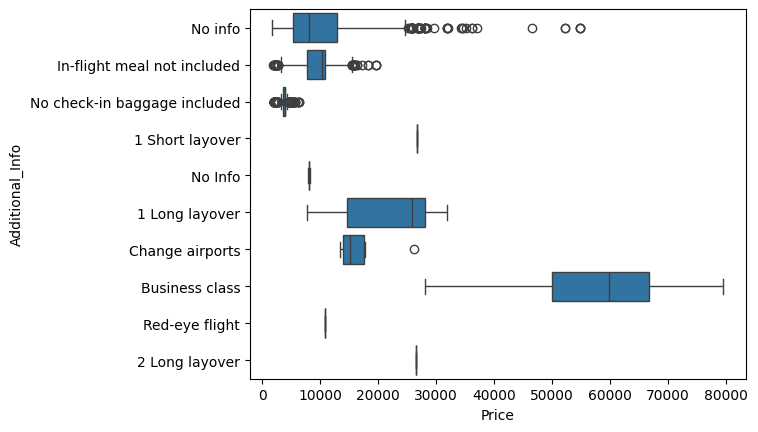

In [472]:
sns.boxplot(x=df['Price'], y=df['Additional_Info'].sort_values())


In [473]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Additional_Info']=le.fit_transform(df['Additional_Info'])


In [474]:
df.head()

,Route,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Total_Duration_Minutes,Source_Delhi
0,BLR → DEL,8,3897,24,3,1,10,22,20,170.0,False
1,CCU → IXR → BBI → BLR,8,7662,1,5,13,15,5,50,445.0,False
2,DEL → LKO → BOM → COK,8,13882,9,6,4,25,9,25,60.0,True
3,CCU → NAG → BLR,8,6218,12,5,23,30,18,5,325.0,False
4,BLR → NAG → DEL,8,13302,1,3,21,35,16,50,285.0,False


In [475]:
route_splits = df['Route'].str.split(' →', expand=True)
route_splits

,0,1,2,3,4,5
0,BLR,DEL,None,None,None,None
1,CCU,IXR,BBI,BLR,None,None
2,DEL,LKO,BOM,COK,None,None
3,CCU,NAG,BLR,None,None,None
4,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...
10678,CCU,BLR,None,None,None,None
10679,CCU,BLR,None,None,None,None
10680,BLR,DEL,None,None,None,None
10681,BLR,DEL,None,None,None,None


In [476]:
route_splits.columns=[f'Route_{i}' for i in range(route_splits.shape[1])] 

In [477]:
for i in range(0,6):
    df[f'Route_{i}']=df['Route'].str.split('→').str[i]
    
df.drop(['Route'], axis=1, inplace =True)


In [478]:
rot = ['Route_2', 'Route_3', 'Route_4']
for i in rot:
    df[i].fillna('None', inplace=True)
df.head()

C:\Users\supep\AppData\Local\Temp\ipykernel_10328\2083223837.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna('None', inplace=True)


,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Total_Duration_Minutes,Source_Delhi,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3897,24,3,1,10,22,20,170.0,False,BLR,DEL,None,None,None,NaN
1,8,7662,1,5,13,15,5,50,445.0,False,CCU,IXR,BBI,BLR,None,NaN
2,8,13882,9,6,4,25,9,25,60.0,True,DEL,LKO,BOM,COK,None,NaN
3,8,6218,12,5,23,30,18,5,325.0,False,CCU,NAG,BLR,None,None,NaN
4,8,13302,1,3,21,35,16,50,285.0,False,BLR,NAG,DEL,None,None,NaN


In [479]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ['Route_0', 'Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    df[i]=le.fit_transform(df[i])
    
df.head()

,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Total_Duration_Minutes,Source_Delhi,Route_0,Route_1,Route_2,Route_3,Route_4,Route_5
0,8,3897,24,3,1,10,22,20,170.0,False,0,13,29,13,5,1
1,8,7662,1,5,13,15,5,50,445.0,False,2,25,1,3,5,1
2,8,13882,9,6,4,25,9,25,60.0,True,3,32,4,5,5,1
3,8,6218,12,5,23,30,18,5,325.0,False,2,34,3,13,5,1
4,8,13302,1,3,21,35,16,50,285.0,False,0,34,8,13,5,1


In [480]:
finaldf=pd.concat([df,Airline,Source,Destination,Total_Stops],axis=1)
finaldf.head()

,Additional_Info,Price,Journey_Date,Journey_Month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Total_Duration_Minutes,Source_Delhi,...,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,2 stops,3 stops,4 stops,non-stop
0,8,3897,24,3,1,10,22,20,170.0,False,...,False,False,False,False,False,True,False,False,False,True
1,8,7662,1,5,13,15,5,50,445.0,False,...,False,False,False,False,False,False,True,False,False,False
2,8,13882,9,6,4,25,9,25,60.0,True,...,False,True,False,False,False,False,True,False,False,False
3,8,6218,12,5,23,30,18,5,325.0,False,...,False,False,False,False,False,False,False,False,False,False
4,8,13302,1,3,21,35,16,50,285.0,False,...,False,False,False,False,False,True,False,False,False,False


<Axes: xlabel='Price', ylabel='Count'>

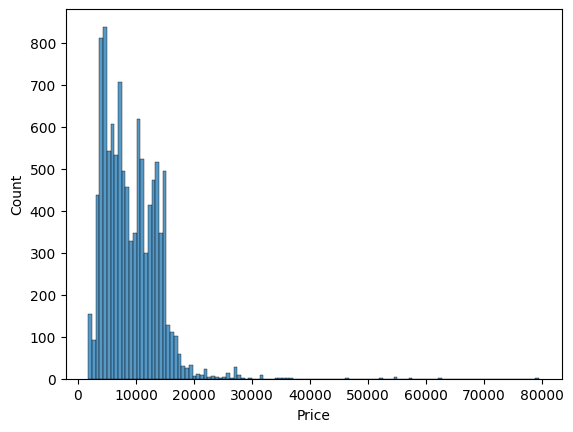

In [481]:
sns.histplot(df['Price'])

In [482]:
from sklearn.model_selection import train_test_split
y=finaldf['Price']
x=finaldf.drop(['Price'], axis=1)


In [485]:
from sklearn.feature_selection import mutual_info_regression,mutual_info_classif
mutual_info_classif(x,y)


imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

KeyboardInterrupt: 

In [486]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.2, random_state=42)

In [491]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def performances(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print("on training mofrl", mean_absolute_error(ytrain,model.predict(xtrain)))
    print("R2 Score:",r2_score(ytest, ypred))
    print("Mean Absolute Error:",mean_absolute_error(ytest, ypred))
    print("Mean Squared Error:",mean_squared_error(ytest, ypred))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest, ypred)))
    
    return ypred

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


models=[LinearRegression(), RandomForestRegressor()]
for model in models:
    pred=performances(model)

on training mofrl 1765.8737391718694
R2 Score: 0.6723843568739125
Mean Absolute Error: 1785.3899734228744
Mean Squared Error: 7064066.949761184
Root Mean Squared Error: 2657.831249301051
on training mofrl 250.54586510026283
R2 Score: 0.91552001392055
Mean Absolute Error: 601.95800398868
Mean Squared Error: 1821562.2181095032
Root Mean Squared Error: 1349.6526286824708


In [494]:
from sklearn.model_selection import cross_val_score
for model in models:
    scores= cross_val_score(model,x,y,cv=5)
    print(scores)

[0.66055758 0.66579325 0.66901085 0.65406029 0.68317277]
[0.9027487  0.89485234 0.9097571  0.90933356 0.90858166]


In [ ]:
rf_model= RandomForestRegressor()
rf_model.fit(xtrain,ytrain)
featureimp=pd.Series(rf_model.feature_importances_, index=x.columns)
featureimp

Additional_Info                      0.092042
Journey_Date                         0.090249
Journey_Month                        0.047966
Arrival_Time_hour                    0.024665
Arrival_Time_min                     0.015424
Dep_Time_hour                        0.020046
Dep_Time_min                         0.016249
Total_Duration_Minutes               0.024298
Source_Delhi                         0.002455
Route_0                              0.012414
Route_1                              0.030192
Route_2                              0.180699
Route_3                              0.031790
Route_4                              0.000178
Route_5                              0.000018
Air India                            0.005721
GoAir                                0.001268
IndiGo                               0.019663
Jet Airways                          0.071445
Jet Airways Business                 0.055608
Multiple carriers                    0.021959
Multiple carriers Premium economy 

In [497]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
gridSearch=GridSearchCV(rf_model, param_grid=param_grid, cv=5)
gridSearch.fit(xtrain,ytrain)
print("BestParamteters: ", gridSearch.best_params_)
print("bestR2 score", gridSearch.best_score_)
print("feature importance:", gridSearch.best_estimator_)

BestParamteters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
bestR2 score 0.8935045475891428
feature importance: RandomForestRegressor(max_depth=20, n_estimators=300)


In [498]:
rf_model= RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=2)
rf_model.fit(xtrain,ytrain)
ypredict=rf_model.predict(xtest)
print("R2 Score:",r2_score(ytest, ypredict))
print("Mean Absolute Error:",mean_absolute_error(ytest, ypredict))
print("Mean Squared Error:",mean_squared_error(ytest, ypredict))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(ytest, ypredict)))

R2 Score: 0.916835955422614
Mean Absolute Error: 595.1123459401757
Mean Squared Error: 1793187.8133226994
Root Mean Squared Error: 1339.0996278554853


<Axes: ylabel='Price'>

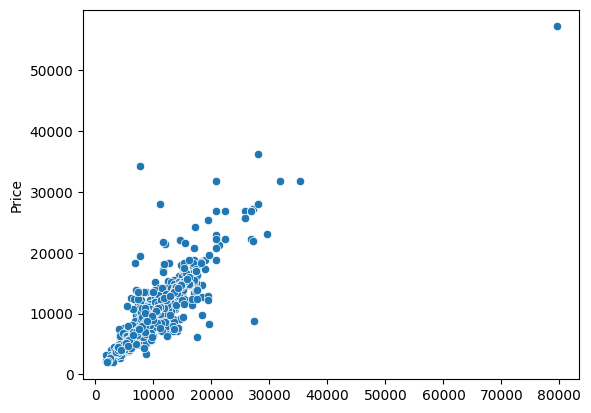

In [505]:
residuals=ytest-ypredict
sns.scatterplot(x=ypredict, y=ytest)

<Axes: xlabel='Price', ylabel='Count'>

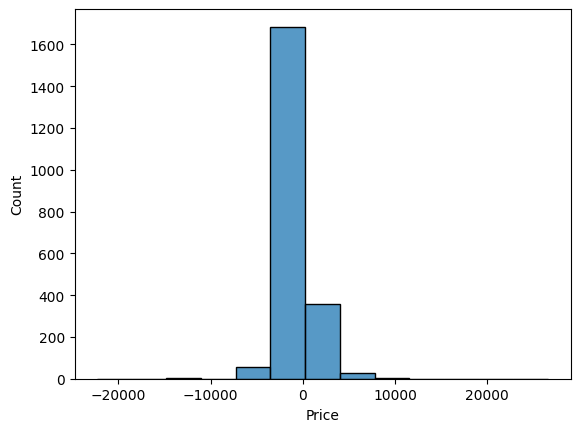

In [504]:
sns.histplot(residuals)

In [509]:
results_df=pd.DataFrame({
    'Actual':ytest,
    "Predicted":ypredict,
   
})

results_df.head(50)

,Actual,Predicted
6075,16655,16840.0
3544,4959,4959.0
9291,9187,8085.0
5032,3858,3597.0
2483,12898,12898.0
9894,10529,9554.5
346,16079,16079.0
6365,7229,7229.0
7624,10844,10844.0
3393,16289,16289.0
